**Набір даних Taxis**
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. 

Детальний опис на сайті: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

*Назва проекту:* Аналіз поїздок у таксі.

*Опис проекту:* Цей проект був створений для аналізу та візуалізації даних про поїздки у таксі у Нью Йорку у 2019 році. Він включає в себе обробку даних, побудову графіків, визначення популярних районів, аналіз методів оплати, найзавантаженіші години та інші аспекти аналізу.

*Функціональність проекту:*
- Обробка та підготовка даних для аналізу.
- Візуалізація даних за допомогою графіків та діаграм.
- Визначення популярних районів.
- Розрахунок прибутку за районами.
- Виведення висновків та рекомендацій для бізнесу на основі аналізу даних.

*Мови та інструменти:* Python, pandas, matplotlib, seaborn.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df_taxi = sns.load_dataset('taxis')

**1. Аналіз даних перед початком роботи**

In [3]:
display(df_taxi[:3])
display(df_taxi.dtypes)
display(df_taxi.shape)


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

**Перевірка на наявність пропущених значень.**

In [4]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [5]:
df = df_taxi[(df_taxi['distance'] == 0) & (df_taxi['total'] != 0)]
display(df)
display(df.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


(51, 14)

In [6]:
new_df = df_taxi[df_taxi['dropoff_zone'].isnull()]
display(new_df)
display(new_df.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


(45, 14)

*ВИСНОВКИ:
Виходячи з аналізу, pickup_zone та pickup_borough пусті в одному й тому ж записі, аналогічно для dropoff_borough та dropoff_zone. Це може означати, що система, яка збирає дані, не мала доступу до цих конкретних інформаційних джерел для цих записів. Наприклад, можливо, не було належного GPS-сигналу для отримання точних координат.*

*Також маємо 51 запис, де distance==0, а total!=0. Можливо, вартість поїздки була фіксованою, та не залежала від відстані.
Можна побачити, що для цих записів pickup_zone та pickup_borough співпадають, аналогічно dropoff_boroug та dropoff_zone. Це може вказувати на технічну помилку, або що поїздка не відбулась - була відмінена (маємо деякі записи де дуже малий проміжок між часом початку і часом закінчення поїздки - менше хвилини), тобто був просто знятий базовий тариф, скоріш за все.*


**1.1 Створимо набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.**


In [7]:
df_taxi_clean = df_taxi.fillna("NA")

In [8]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

**2. Аналіз сумарних платежів по дням.**

In [9]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

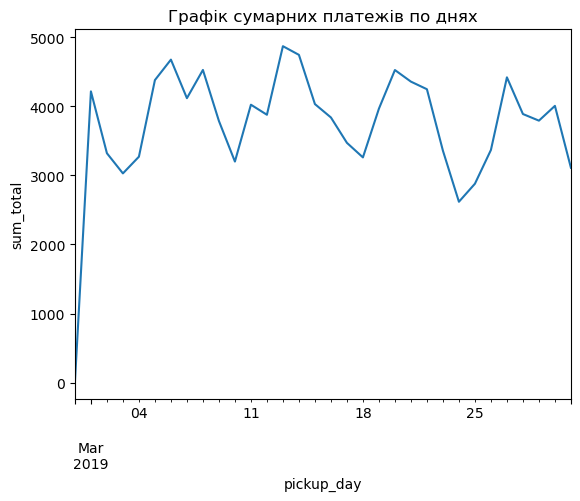

In [10]:
grouped_data = df_taxi_clean.groupby(df_taxi_clean['pickup_day'])['total'].sum().plot();
plt.xlabel('pickup_day')
plt.ylabel('sum_total')
plt.title('Графік сумарних платежів по днях')
plt.show()

*Маємо день з сумарним платежем ~=1, треба розібратись більш детально з чим це може бути повязано.*

In [11]:
df_taxi_clean.groupby(df_taxi_clean['pickup_day'])['pickup_day'].count()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
Name: pickup_day, dtype: int64

*Для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видалимо його з набору даних та знову виведемо графік сумарних платежів по pickup_day.*

In [12]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup'].dt.date != pd.to_datetime('2019-02-28').date()]

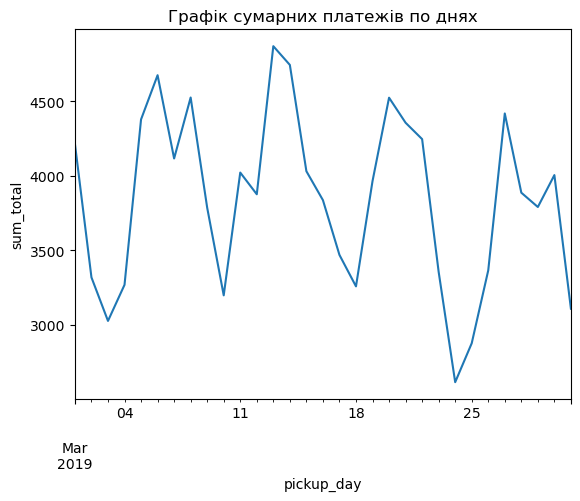

In [13]:
grouped_data = df_taxi_clean.groupby(df_taxi_clean['pickup_day'])['total'].sum().plot();
plt.xlabel('pickup_day')
plt.ylabel('sum_total')
plt.title('Графік сумарних платежів по днях')
plt.show()

**3. Динаміка сумарних платежів по районам.**

In [14]:
borough_pivot = df_taxi_clean.pivot_table(values='total', index='pickup_day', columns='pickup_borough', aggfunc='sum')
del borough_pivot['NA']
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


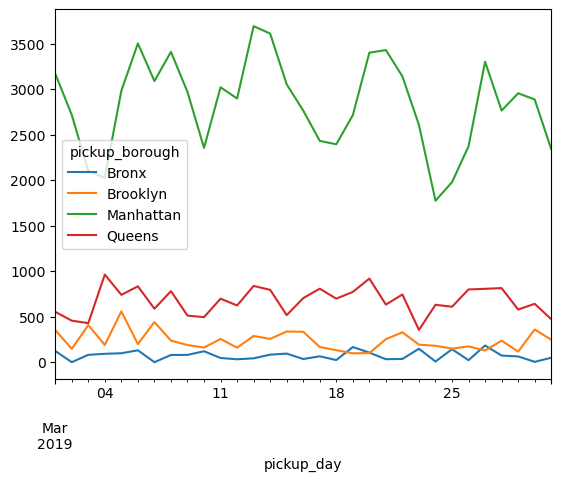

In [15]:
borough_pivot.fillna(0).plot();

*Найбільша сума денних платежів за поїздки в таксі у Manhattan.*

**4.Суми денних платежів за поїздки в розрізі районів.**

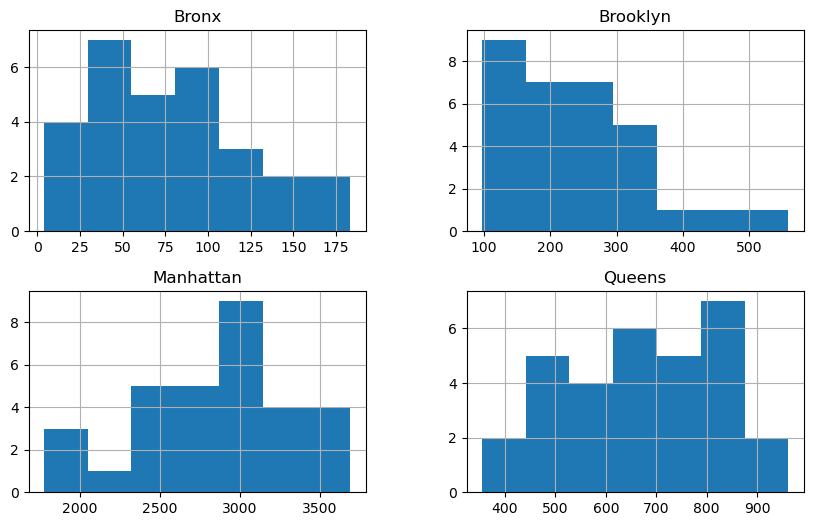

In [16]:
df_pivot = pd.DataFrame(borough_pivot)
df_pivot.hist(figsize=(10,6), bins=7)
plt.show()

*Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Порівняємо розподіли денних сум платежів по райнам.*

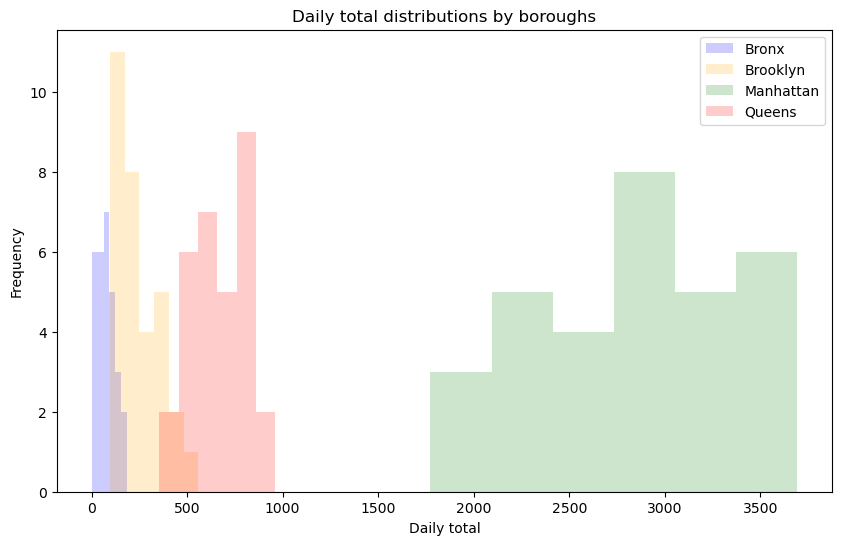

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Daily total distributions by boroughs")
ax.set_xlabel("Daily total")
ax.set_ylabel("Count of rides")

borough_pivot['Bronx'].plot(kind='hist', bins=6, alpha=0.2, color='blue', ax=ax, label='Bronx')
borough_pivot['Brooklyn'].plot(kind='hist', bins=6, alpha=0.2, color='orange', ax=ax, label='Brooklyn')
borough_pivot['Manhattan'].plot(kind='hist', bins=6, alpha=0.2, color='green', ax=ax, label='Manhattan')
borough_pivot['Queens'].plot(kind='hist', bins=6, alpha=0.2, color='red', ax=ax, label='Queens')

ax.legend()
plt.show()

**5.Суми щомісячних платежів по кольорам автомобілів.**

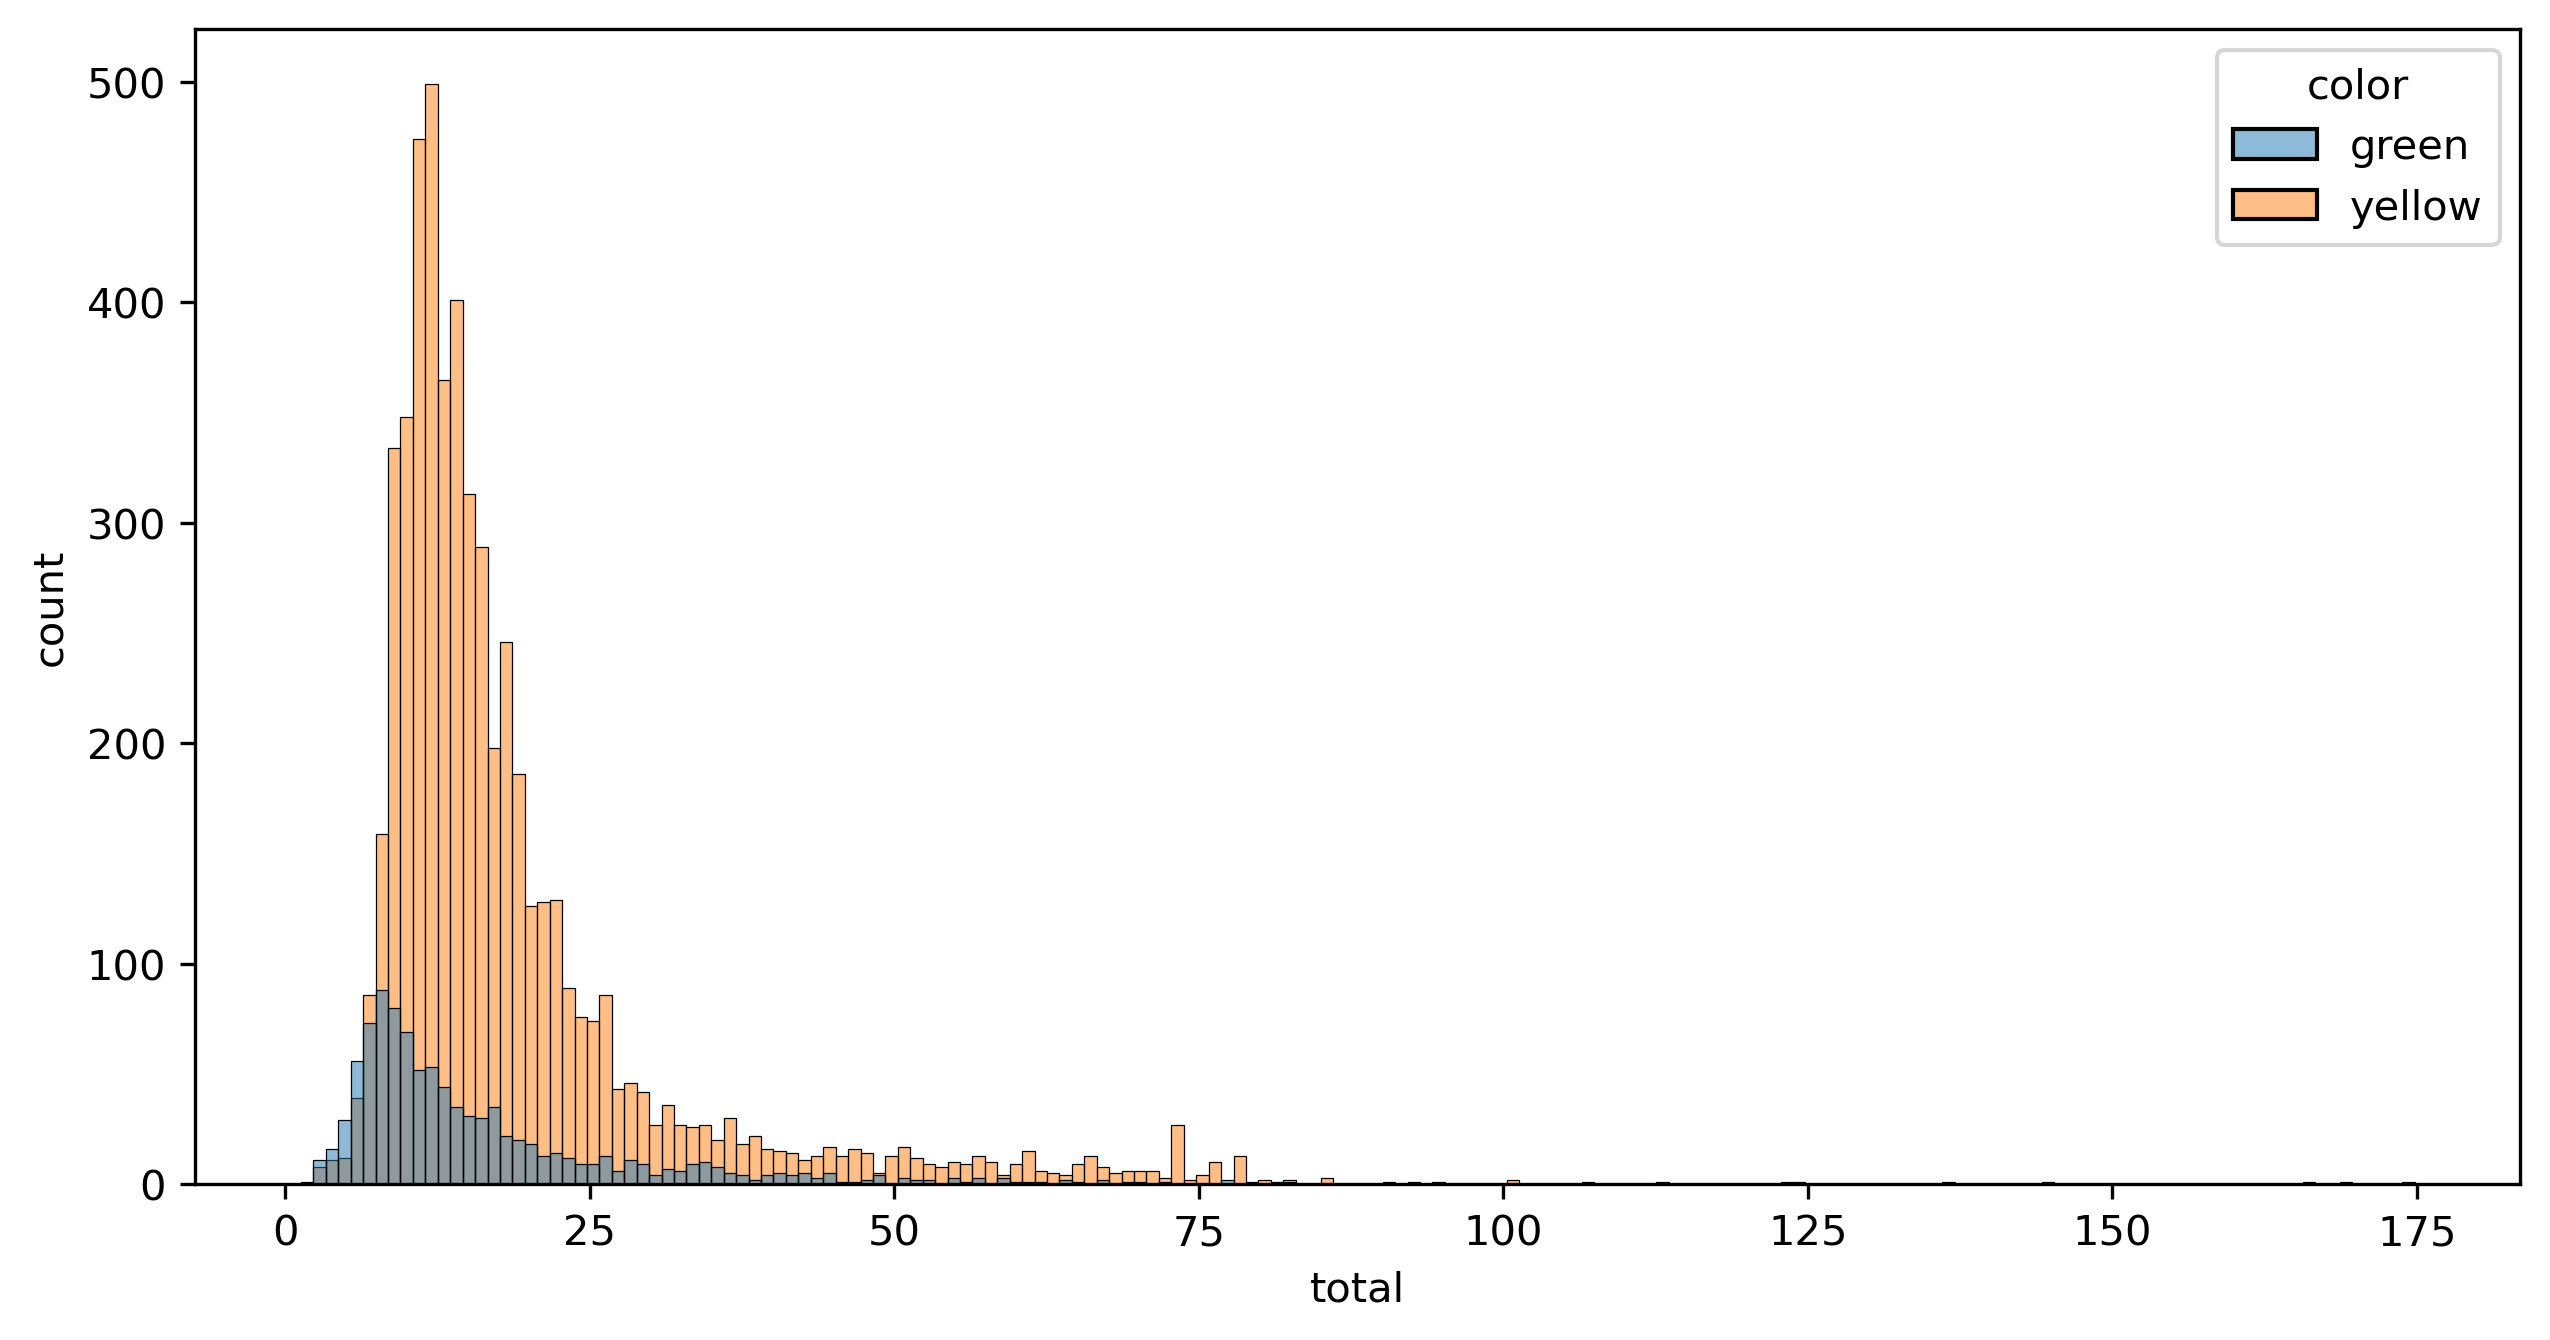

In [18]:
plt.figure(figsize=(10, 5), dpi=300)

df_sorted_color = df_taxi_clean.sort_values('color')
colors = df_sorted_color['color'].unique()

sns.histplot(data=df_sorted_color, x='total', hue='color', bins=170, element='bars', legend=True, edgecolor='black')

plt.xlabel('total')
plt.ylabel('count')
plt.show()

**6.Чи є залежність між дальністю поїздки і розміром чайових?**

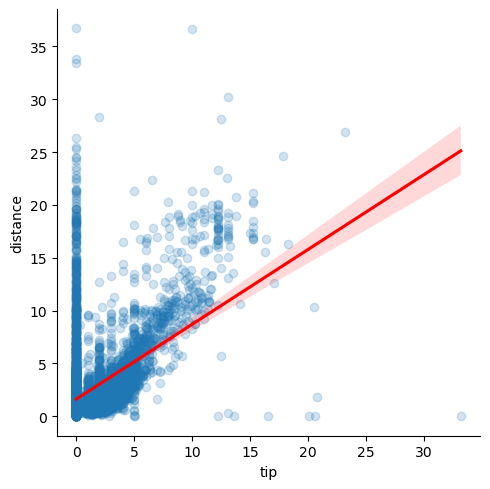

In [19]:
sns.lmplot(data=df_taxi_clean, x="tip", y="distance", line_kws={'color': 'red'}, scatter_kws={'alpha': 0.2})
plt.show()

*Відзнаємо наявність декількох точок з однаковим значенням х (розмір чайових = 0), але з різними значеннями y (різна дистанція).
У цьому випадку, незалежно від того, яка дистанція поїздки, розмір чайових залишається постійним = 0. Пряма лінія, паралельна осі "у", свідчить про відсутність залежності між цими двома змінними.
Це може означати, що розмір чайових не залежить від того, наскільки довго або коротко триває поїздка. В цьому випадку, незалежно від того, яка дистанція поїздки, розмір чайових залишається постійним.**

**7.Поденна динаміка чайових по районам, в яких забрали пасажира.**

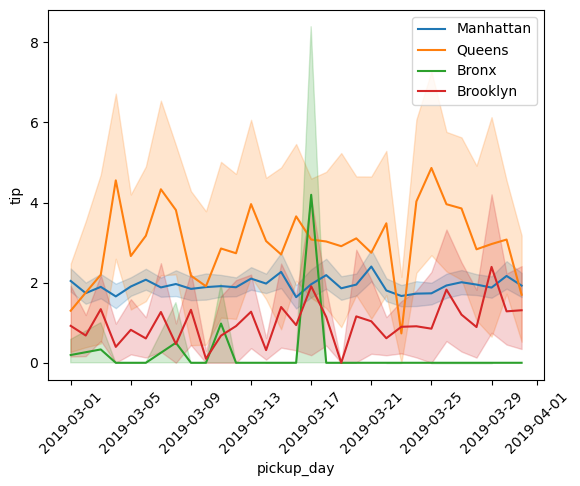

In [20]:
df_filtered = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
sns.lineplot(data=df_filtered , x='pickup_day', y='tip', hue='pickup_borough')

plt.xlabel('pickup_day')
plt.ylabel('tip')

plt.xticks(rotation=45)
plt.legend()
plt.show()

*Найнижчий середній розмір чайових у районі Bronx.*

*Найвижчий середній розмір чайових у районі Queens.*

*Найстабільніший розмір чайових у районі Manhattan.*

**8. Побудуємо box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки.**

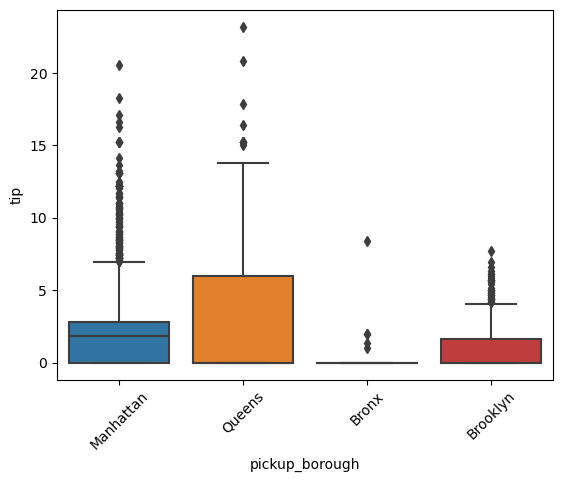

In [21]:
df_filtered = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
sns.boxplot(data=df_filtered, x='pickup_borough', y='tip')

plt.xlabel('pickup_borough')
plt.ylabel('tip')

plt.xticks(rotation=45)
plt.show()


**9. Графік кількості поїздок в залежності від часу доби**

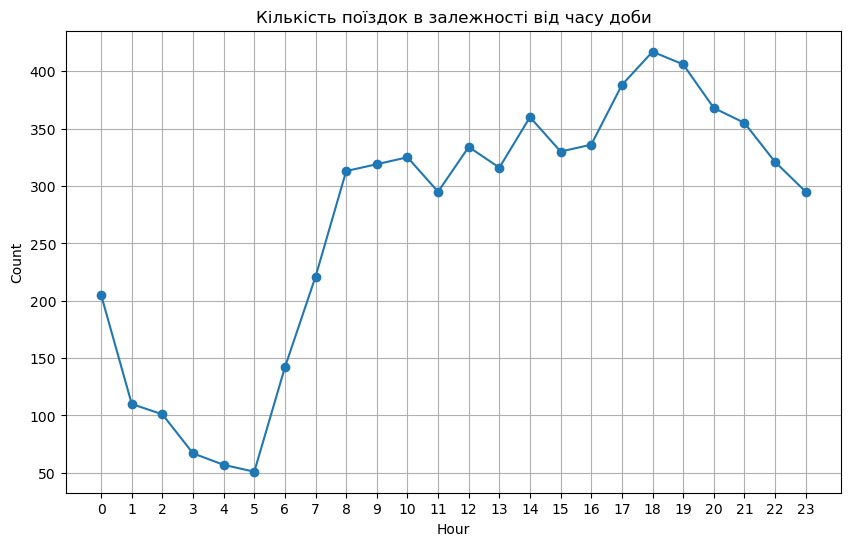

In [22]:
df_taxi_clean['hour'] = df_taxi_clean['pickup'].dt.hour

hourly_trips = df_taxi_clean['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_trips.index, hourly_trips.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Кількість поїздок в залежності від часу доби')
plt.xticks(range(24))
plt.grid(True)
plt.show()

*Пік попиту (кількості поїздок) припадає на 18:00, цей час зазвичай є кінцем робочого дня, також значна кількість поїздок вранці та в обідній час.
Аналізуючи кількість поїздок за годинами доби, бізнес може планувати розклад роботи водіїв. Залежно від пікових годин, можна стимулювати водіїв працювати в ці періоди, пропонуючи їм бонуси або підвищені тарифи.*


**10. Графік розподілу методів оплати:**

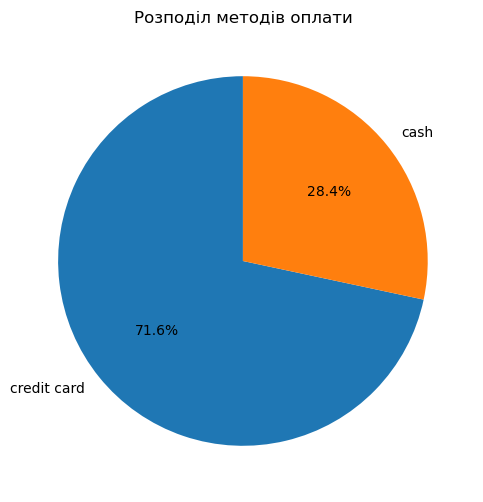

In [23]:
payment_counts_filtered = df_taxi_clean[df_taxi_clean['payment'] != 'NA']
payment_counts = payment_counts_filtered['payment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Розподіл методів оплати')
plt.show()

*Як бачимо, оплата картою є більш популярною, тобто найчастіше використовуються пасажирами. Це може бути корисною інформацією для бізнесу, який може пропонувати зручніші методи оплати або надавати знижки за використання певних платіжних систем.*

**11. З якого району найчастіше викликають таксі?**

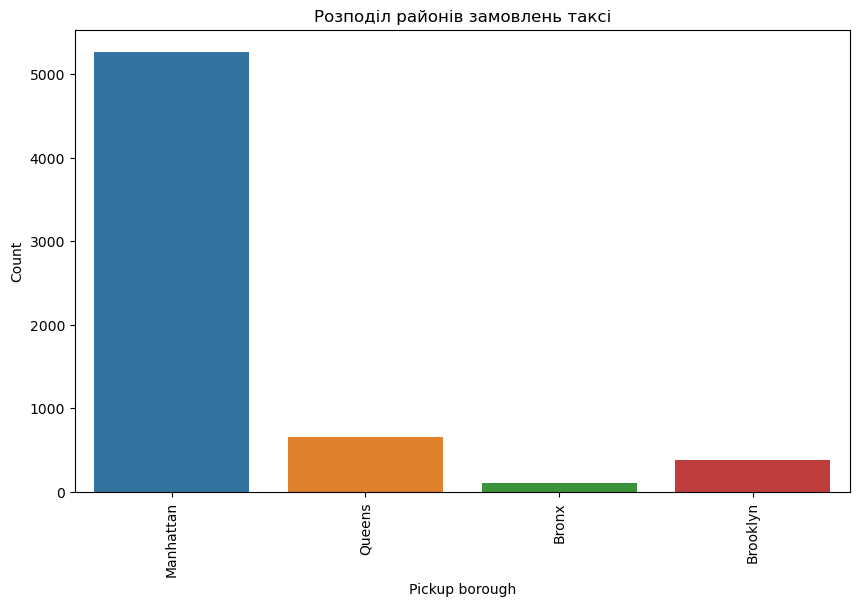

In [24]:
plt.figure(figsize=(10, 6))
pickup_borough_filtered = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
sns.countplot(data=pickup_borough_filtered, x='pickup_borough')
plt.title("Розподіл районів замовлень таксі")
plt.xlabel("Pickup borough")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

*Аналіз графіка розподілу районів замовлень таксі дозволяє бізнесу краще розуміти популярні місця та райони для поїздок, що сприяє оптимізації діяльності, плануванню та вдосконаленню обслуговування клієнтів.
Можна направляти автомобілі до популярних районів або надавати стимули водіям для прибуття в ці райони.*